**Question 8.** Given a chemical reaction as follow:

$$
E+S\underset{k_2}{\stackrel{k_1}{\rightleftharpoons}}ES{\stackrel{k_3}{\rightarrow}E+P}
$$


**Question 8.1.** 

Terri A. Grosso gave a [nice talk](http://www.lehman.edu/academics/cmacs/documents/2MathBio.pdf) about this model, namely the Michaelis-Menten Model of enzyme kinetics. Therefore, for the first reaction, which is a reversible reaction, $r_{net}=r_{forward}+r_{reverse}$ applies to all species. Therefore, according to the law of mass action:

$$
\begin{cases}
r_{ES}=k_1[E][S]-k_2[ES]-k_3[ES]\\
r_{E}=k_3[ES]+k_2[ES]-k_1[E][S]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

Upon simplification, we get: 

$$
\begin{cases}
r_{ES}=k_1[E][S]-(k_2+k_3)[ES]\\
r_{E}=-k_1[E][S]+(k_2+k_3)[ES]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

**Question 8.2.** 

Write a code to numerically solve these four equations using the fourth-order RungeKutta method. For this exercise, assume that the initial concentration of E is 1 µM, the initial concentration of S is 10 µM, and the initial concentrations of ES and P are both 0. The rate constants are: k1 =100/µM/min, k2 =600/min, k3 =150/min. 

And then we need to solve the equations with the fourth-order Runge-Kutta method. (Thinking COPASI can do the job... I have never studied ODE...)[References: [1](https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/),[2](https://www.zhihu.com/question/45259131/answer/1603755435),[3](http://hplgit.github.io/primer.html/doc/pub/ode2/._ode2-readable003.html) ]


Recall that SIR model is almost the same as the chemical equilibrium model here:

> Particularly, the SIR model resembles a dynamic model of a batch reactor carrying out an autocatalytic reaction with catalyst deactivation. This analogy between disease transmission and chemical reaction enables the exchange of ideas between epidemic and chemical kinetic modeling communities. 
>
> Simon CM. 2020. The SIR dynamic model of infectious disease transmission and its analogy with chemical kinetics. PeerJ Physical Chemistry 2:e14 https://doi.org/10.7717/peerj-pchem.14


Using the enzyme conservation law, we know that $[ES] = [E]_0 - [{E}]=1 µM- [{E}]$ and $[P]=[S]_0-[ES]-[S]$. Let $m=[ES],e=[E],s=[S],p=[P]$. Therefore, the key functions needed to be solved can be written as:

$$
\begin{cases}
f(m)=100es-750m\\
g(e)=-100es+750m\\
h(s)=-100es+600m\\
l(p)=150m
\end{cases}
$$

given conditions that:
$$
\begin{cases}
e_{0}=1 \\
s_{0}=10  \\ 
m_{0}=p_{0}=0 
\end{cases}
$$

and that: 
$$
\begin{cases}
m=1-e \\
p=10-m-s  \\ 
\end{cases}
$$


Thus, 

$$
\begin{cases}
f(m)=100(1-m)s-750m\\
h(s)=-100(1-m)s+600m\\
l(p)= 150m
\end{cases}
$$


Upon simplification,

$$
\begin{cases}
f(m)= -100ms-750m+100ms\\
h(s)= 100ms+600m-100\\
l(p)= 150m
\end{cases}
$$

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

def fc(N, b, gamma):
    fc = gamma*b
    return fc

def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [7]:
def reaction(N, b0, beta, gamma, hs):
    
    """
    N = total amount of substance
    beta = transition rate S->P
    gamma = transition rate P->S
    k =  delta S
    hs = step length
    """
    
    # initial state
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # runtime
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec



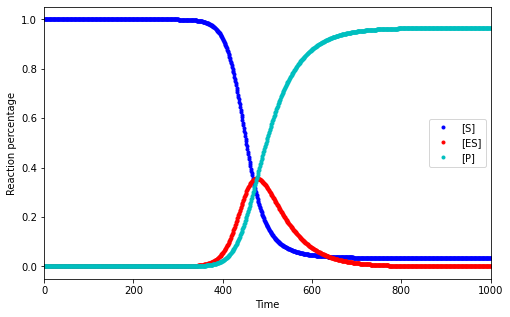

In [12]:
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='[S]');
plt.plot(inf, 'r.', label='[ES]');
plt.plot(rec, 'c.', label='[P]');
plt.title("")
plt.xlabel("Time", fontsize=10);
plt.ylabel("Reaction percentage", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('model.png')
plt.show()

**Question 8.3.**

We define the velocity, V, of the enzymatic reaction to be the rate of change of the product P. Plot the velocity V as a function of the concentration of the substrate S. You should find that, when the concentrations of S are small, the velocity V increases approximately linearly. At large concentrations of S, however, the velocity V saturates to a maximum value, Vm . Find this value V m from your plot.

**Mathmatically,** Consider $V$ a function of $[S]$. Hence, $V=\frac{d[P]}{dt}=f([S])$. According to the Michaelis–Menten equation, $V = \frac{\mathrm{d} [P]}{\mathrm{d} t} = V_\max \frac{[S]}{K_\mathrm{M} + [S]} $. When $[S]$ approaches $+\infty$, $V$ approaches to $V_\max= k_\mathrm{3} [E]_0 \frac{[S]}{K_\mathrm{M} + [S]}=150µM/min$.

**Computationally,** we have previously know that $V=150-150e$